In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employees.csv')
df.head()

,ID,Name,Department,Experience_Years,Salary,Performance_Score
0,101,Employee_1,Marketing,12.0,65791.0,71.0
1,102,Employee_2,Finance,7.0,50456.0,78.0
2,103,Employee_3,Sales,9.0,60300.0,52.0
3,104,Employee_4,Finance,8.0,56067.0,61.0
4,105,Employee_5,Finance,12.0,62160.0,75.0


In [5]:
print("Missing values before imputation:")
print(df.isna().sum())
print()

experience_mean = df['Experience_Years'].mean()
df['Experience_Years'].fillna(experience_mean, inplace=True)

performance_median = df['Performance_Score'].median()
df['Performance_Score'].fillna(performance_median, inplace=True)

print("Missing values after imputation:")
print(df.isna().sum())
print()
df.head()

Missing values before imputation:
ID                    0
Name                  0
Department            0
Experience_Years     10
Salary                0
Performance_Score     8
dtype: int64

Missing values after imputation:
ID                   0
Name                 0
Department           0
Experience_Years     0
Salary               0
Performance_Score    0
dtype: int64



C:\Users\LOQ\AppData\Local\Temp\ipykernel_14316\1970007753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience_Years'].fillna(experience_mean, inplace=True)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_14316\1970007753.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,ID,Name,Department,Experience_Years,Salary,Performance_Score
0,101,Employee_1,Marketing,12.0,65791.0,71.0
1,102,Employee_2,Finance,7.0,50456.0,78.0
2,103,Employee_3,Sales,9.0,60300.0,52.0
3,104,Employee_4,Finance,8.0,56067.0,61.0
4,105,Employee_5,Finance,12.0,62160.0,75.0


In [ ]:
def calculate_bonus(row):
    if row['Performance_Score'] > 85:
        return row['Salary'] * 0.10
    else:
        return row['Salary'] * 0.05
    
df['Bonus'] = df.apply(calculate_bonus, axis=1)
df

,ID,Name,Department,Experience_Years,Salary,Performance_Score,Bonus
0,101,Employee_1,Marketing,12.0,65791.0,71.0,3289.55
1,102,Employee_2,Finance,7.0,50456.0,78.0,2522.80
2,103,Employee_3,Sales,9.0,60300.0,52.0,3015.00
3,104,Employee_4,Finance,8.0,56067.0,61.0,2803.35
4,105,Employee_5,Finance,12.0,62160.0,75.0,3108.00
...,...,...,...,...,...,...,...
95,196,Employee_96,Sales,10.0,59901.0,86.0,5990.10
96,197,Employee_97,Finance,12.0,63686.0,75.0,3184.30
97,198,Employee_98,HR,8.0,55009.0,73.0,2750.45
98,199,Employee_99,HR,11.0,67306.0,84.0,3365.30


In [12]:
df.groupby('Department').mean(['Salary', 'Performance_Score'])[['Salary', 'Performance_Score']]

,Salary,Performance_Score
Department,,
Finance,56458.263158,74.947368
HR,58583.809524,75.000000
IT,52022.888889,75.166667
Marketing,57570.730769,73.000000
Sales,55585.625000,73.875000


<Axes: xlabel='Experience_Years', ylabel='Salary'>

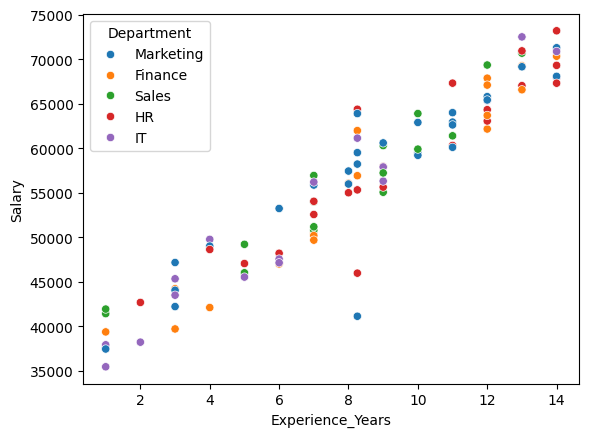

In [18]:
sns.scatterplot(data=df, x='Experience_Years', y='Salary', hue='Department')

<Axes: xlabel='Salary', ylabel='Department'>

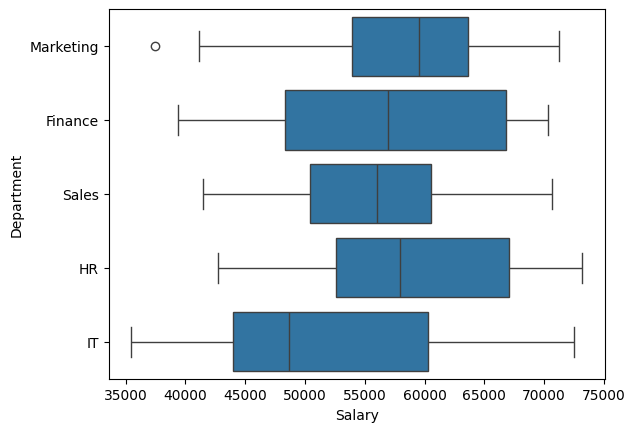

In [19]:
sns.boxplot(data=df, x='Salary', y='Department')

In [41]:
Department = df.groupby('Department')['Salary'].median()
max_Department = Department.idxmax()

print("Department that have the highest median salary:", max_Department)

Department that have the highest median salary: Marketing
